In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered_rankedidea/Allct/perctcorr/cross_correlation/try1_flow/ranked_v1_top500'
#Cytof
#orderedcells=['NaiveCD4','cm4', 'em4','Tregs','NK','Mono','NaiveCD8','cm8','em8','ed8', 'nB','mB']

#Flow
orderedcells=['NaiveCD4','cm4', 'em4','Tregs','NK','Mono', 'nB','mB']
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

df

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,nB_real,NaiveCD4_real,NaiveCD8_real,Tregs_real,cm4_real,em4_real,cm8_real,em8_real,ed8_real,PC_real
Mixture,,,,,,,,,,,,,,,,,,,,,
healthy_NU-03-bulk-PBMC,1033.368701,614.873701,645.299226,720.701772,455.071256,585.856548,597.341864,622.919927,437.364400,248.926098,...,0.052549,0.1395,0.2416,0.0028,0.101,0.048,0.019,0.089,0.054,0.0002
healthy_NU-14-bulk-PBMC,1183.323521,1042.584029,625.521238,1010.471767,481.821792,567.474583,512.470941,553.832063,432.619551,272.631473,...,0.047287,0.1151,0.2385,0.0012,0.085,0.032,0.012,0.103,0.028,0.0001
healthy_NU-24-bulk-PBMC,1513.079814,858.060013,622.154518,808.102482,410.891315,652.774984,560.032868,529.558116,386.892855,252.504550,...,0.047635,0.2475,0.1426,0.0044,0.093,0.051,0.010,0.072,0.045,0.0005
healthy_NU-31-bulk-PBMC,1186.996642,861.026362,652.877357,1387.575900,415.800312,600.184545,566.959394,597.623907,412.650159,270.021078,...,0.055825,0.1548,0.2393,0.0011,0.082,0.036,0.008,0.073,0.049,0.0001
healthy_NU-49-bulk-PBMC,1299.120885,995.146065,790.220676,677.160587,478.433545,551.358651,561.869924,598.822518,438.032648,261.267208,...,0.069583,0.1274,0.2395,0.0019,0.084,0.066,0.012,0.082,0.045,0.0001
healthy_NU-50-bulk-PBMC,1154.617823,703.956587,969.149148,919.490691,384.700535,715.297681,579.437548,620.710187,423.372440,263.556368,...,0.089854,0.1453,0.1083,0.0014,0.077,0.017,0.009,0.035,0.018,0.0013
healthy_NU-51-bulk-PBMC,1187.939357,752.981940,539.760360,1292.436171,379.737084,645.905566,498.678883,539.308278,379.271089,259.116185,...,0.038346,0.1061,0.0911,0.0021,0.056,0.035,0.004,0.030,0.021,0.0002


In [3]:
gt = []
est = []
for col in df.columns:
    if '_real' in col:
        gt.append(col[:-5])
    else:
        est.append(col)
        
cells = list(set(gt) & set(est))

In [4]:
pearson_dic = {}
spearman_dic = {}
for cell in cells:
    cell_arr = np.array(df[cell])
    pearson_dic[cell] = []
    spearman_dic[cell] = []
    for cell_real in cells:
        cell_real_arr = np.array(df[cell_real + '_real'])
        pearson_corr = pearsonr(cell_arr, cell_real_arr)[0]
        spearman_corr = spearmanr(cell_arr, cell_real_arr)[0]
        pearson_dic[cell].append(pearson_corr)
        spearman_dic[cell].append(spearman_corr)
        
df_pearson = pd.DataFrame.from_dict(pearson_dic, orient='index', columns=cells)
df_spearman = pd.DataFrame.from_dict(spearman_dic, orient='index', columns=cells)



In [5]:
standardnamedict={"NaiveCD4": "Naive CD4 T", "NaiveCD8": "Naive CD8 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'PC','cm8':'CD8 TCM','em8':'CD8 TEM','m8':'CD8 memory','ed8':'CD8 TEMRA','cm4':'CD4 TCM','em4':'CD4 TEM','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte','Er':'Erythrocyte'}

In [6]:



df_pearson=df_pearson.reindex(orderedcells)
df_pearson=df_pearson[orderedcells]

df_spearman=df_spearman.reindex(orderedcells)
df_spearman=df_spearman[orderedcells]



df_pearson.rename(columns=standardnamedict,inplace=True)
df_pearson.rename(index=standardnamedict,inplace=True)

df_spearman.rename(columns=standardnamedict,inplace=True)
df_spearman.rename(index=standardnamedict,inplace=True)

df_pearson.head()

,Naive CD4 T,CD4 TCM,CD4 TEM,Tregs,NK,Mono,Naive B,Memory B
Naive CD4 T,0.747467,0.069092,0.413782,0.611143,-0.334303,-0.254411,-0.133961,-0.220244
CD4 TCM,0.322732,0.804100,0.796774,0.537327,-0.656469,-0.571060,-0.011850,-0.293459
CD4 TEM,0.010145,0.834931,0.458097,0.247645,-0.337410,-0.481450,-0.050372,-0.173600
Tregs,0.240969,0.736988,0.868087,0.369805,-0.527762,-0.645190,-0.009126,-0.136323
NK,-0.254488,-0.647998,-0.530854,-0.471598,0.878329,0.128649,-0.336847,0.417194


In [7]:
df_pearson.to_csv(file + '_pearson.txt', sep='\t')
df_spearman.to_csv(file + '_spearman.txt', sep='\t')

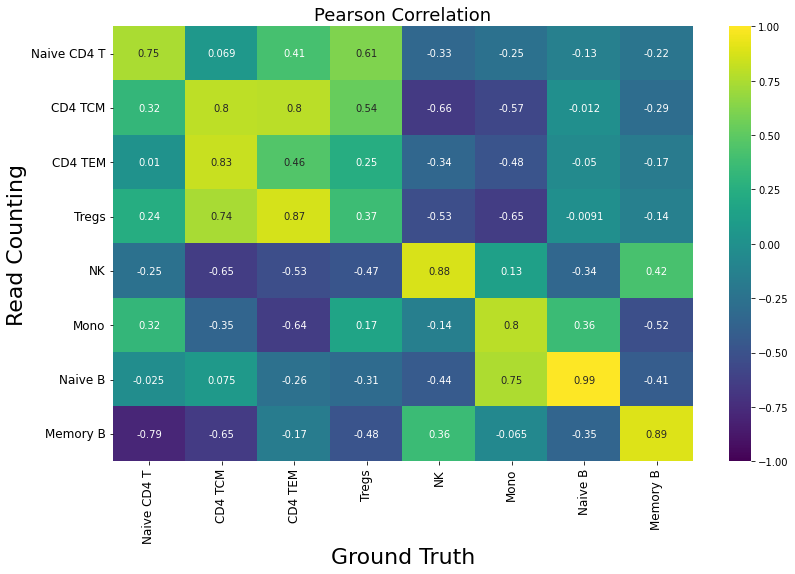

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))

sns.heatmap(df_pearson, cmap='viridis', annot=True,annot_kws={"size": 10}, ax=ax, vmin=-1, vmax=1)
ax.set_xlabel('Ground Truth', fontsize=22)
ax.set_ylabel('Read Counting', fontsize=22)
ax.set_title('Pearson Correlation', fontsize=18)

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12,rotation=90)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12,rotation=0)


plt.savefig(file + '_pearson.pdf', bbox_inches='tight')

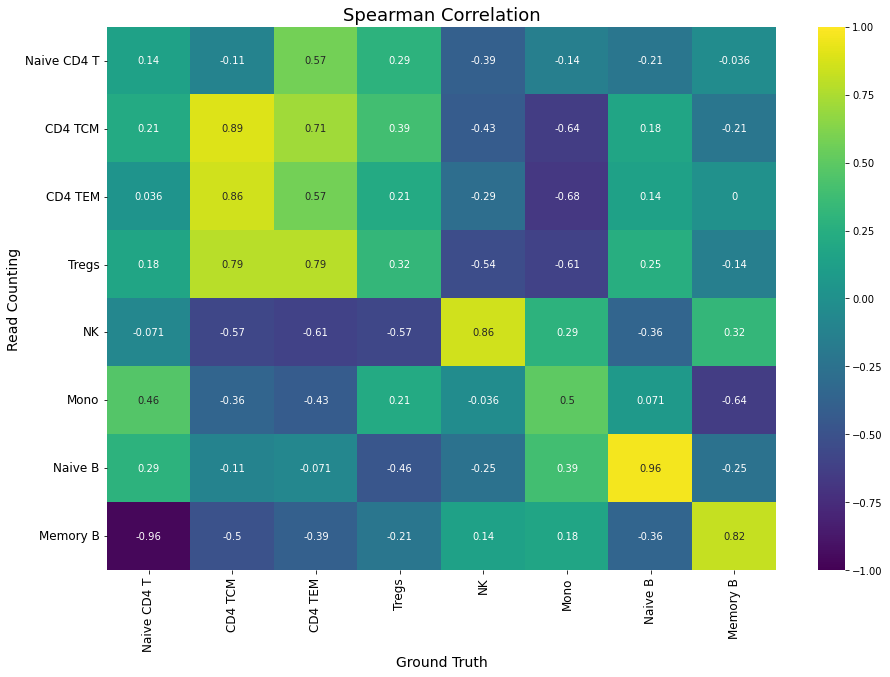

In [9]:
fig2, ax2 = plt.subplots(1, 1, figsize=(15, 10))

sns.heatmap(df_spearman, cmap='viridis', annot=True,annot_kws={"size": 10}, ax=ax2, vmin=-1, vmax=1)
ax2.set_xlabel('Ground Truth', fontsize=14)
ax2.set_ylabel('Read Counting', fontsize=14)
ax2.set_title('Spearman Correlation', fontsize=18)

ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 12,rotation=90)
ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 12,rotation=0)

plt.savefig(file + '_spearman.pdf', bbox_inches='tight')